In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("/kaggle/input/playground-series-s4e2/train.csv")

# Prepare the data

1. Get rid of NaN if present

2. Check dypes of parameters

In [6]:
df.head(3)

"""
The data consist of the estimation of obesity levels in people from the countries of Mexico,
Peru and Colombia, with ages between 14 and 61 and diverse eating habits and physical condition ,
data was collected using a web platform with a survey where anonymous users answered each question,
then the information was processed obtaining 17 attributes and 2111 records.
"""

"""
Frequent consumption of high caloric food (FAVC)
Frequency of consumption of vegetables (FCVC)
Number of main meals (NCP)
Consumption of food between meals (CAEC)
Consumption of water daily (CH20)
Consumption of alcohol (CALC)
Calories consumption monitoring (SCC)
Physical activity frequency (FAF)
Time using technology devices (TUE)
Transportation used (MTRANS)

"""

'\nFrequent consumption of high caloric food (FAVC)\nFrequency of consumption of vegetables (FCVC)\nNumber of main meals (NCP)\nConsumption of food between meals (CAEC)\nConsumption of water daily (CH20)\nConsumption of alcohol (CALC)\nCalories consumption monitoring (SCC)\nPhysical activity frequency (FAF)\nTime using technology devices (TUE)\nTransportation used (MTRANS)\n\n'

In [7]:
df.describe(include = 'object')

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
count,20758,20758,20758,20758,20758,20758,20758,20758,20758
unique,2,2,2,4,2,2,3,5,7
top,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
freq,10422,17014,18982,17529,20513,20071,15066,16687,4046


In [8]:
# Okay, no nan

df.isna().any(axis = 0)

id                                False
Gender                            False
Age                               False
Height                            False
Weight                            False
family_history_with_overweight    False
FAVC                              False
FCVC                              False
NCP                               False
CAEC                              False
SMOKE                             False
CH2O                              False
SCC                               False
FAF                               False
TUE                               False
CALC                              False
MTRANS                            False
NObeyesdad                        False
dtype: bool

# EDA and Data Prepocessing

EDA

1) Drop highly corelating features -> very bad for linear models

2) Drop features with low target dispersion (they dont have any value)


Data Prepocessing

1) Save categorical variables 

2) Encode categorical variables using encoding techniques

3) Encode target with numerical values

/// 

* Test against encoding with numbers to see weather gradient boosing is affected by encoding teqnique (must be not, because uses trees)



In [9]:
cat_features = df.dtypes[df.dtypes == 'object'].index.values[:-1]
num_features = df.dtypes[df.dtypes != "object"].index.values

In [10]:
cat_features

array(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC',
       'SMOKE', 'SCC', 'CALC', 'MTRANS'], dtype=object)

In [11]:
num_features

array(['id', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF',
       'TUE'], dtype=object)

In [12]:
df['NObeyesdad'].unique()
df = df.rename(columns = {"NObeyesdad":"target"})

## Numerical Features

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='target', ylabel='Count'>

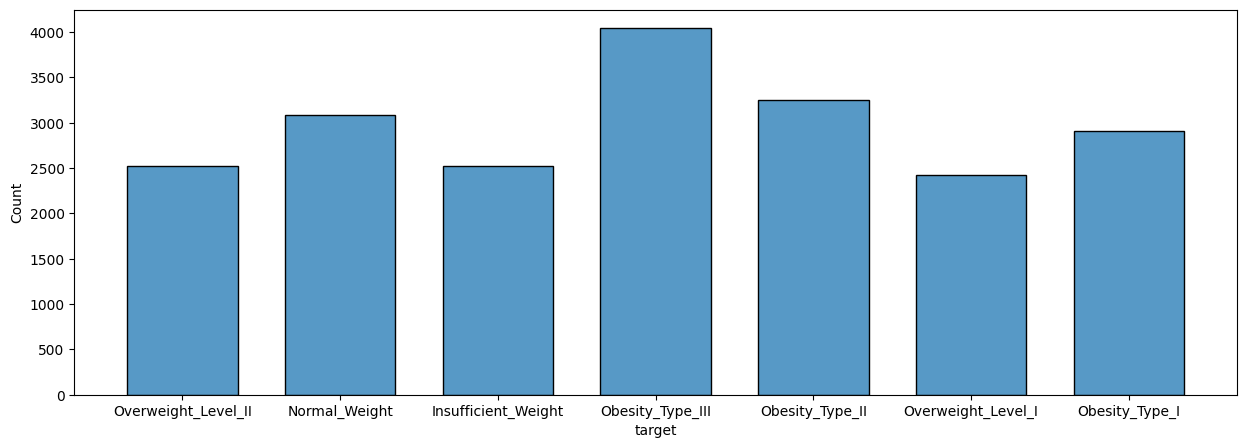

In [13]:
# Okay not even number of classes is present in the dataset

plt.figure(figsize = (15,5))
sns.histplot(x = df['target'],shrink = 0.7)

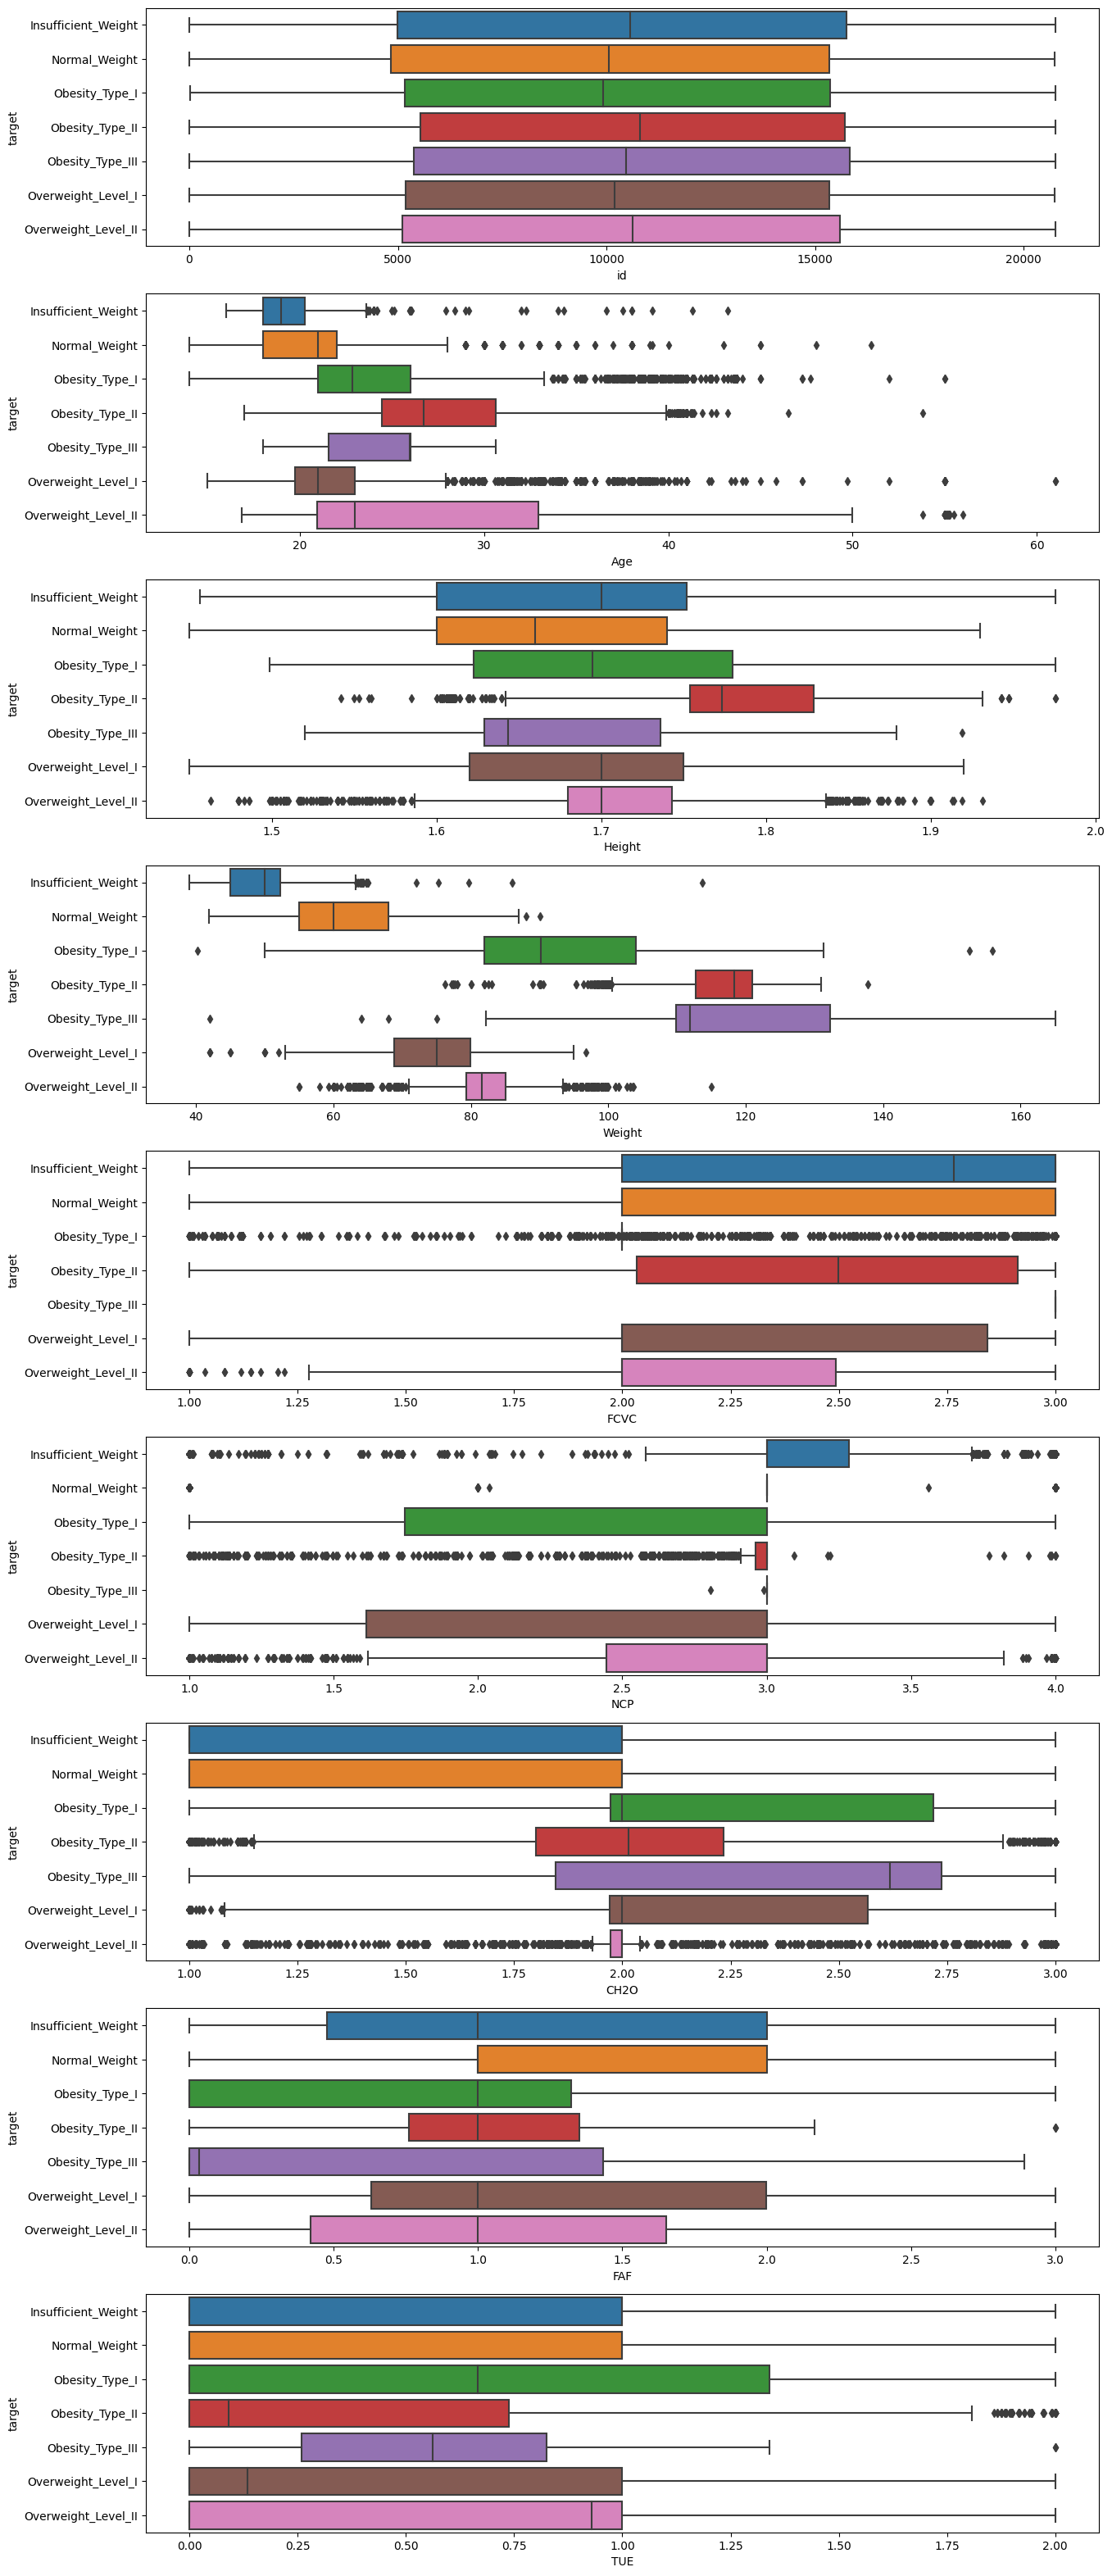

In [14]:
# Seems like all features are representative in terms of target distribution

import warnings
warnings.filterwarnings('ignore')

n  = len(num_features)
plt.figure(figsize = (15,40))
for feature in range(n):
    plt.subplot(n,1,feature+1)
    sns.boxplot(y = df['target'].astype("category"), x = df[num_features[feature]], orient = 'h')

# Categorical features

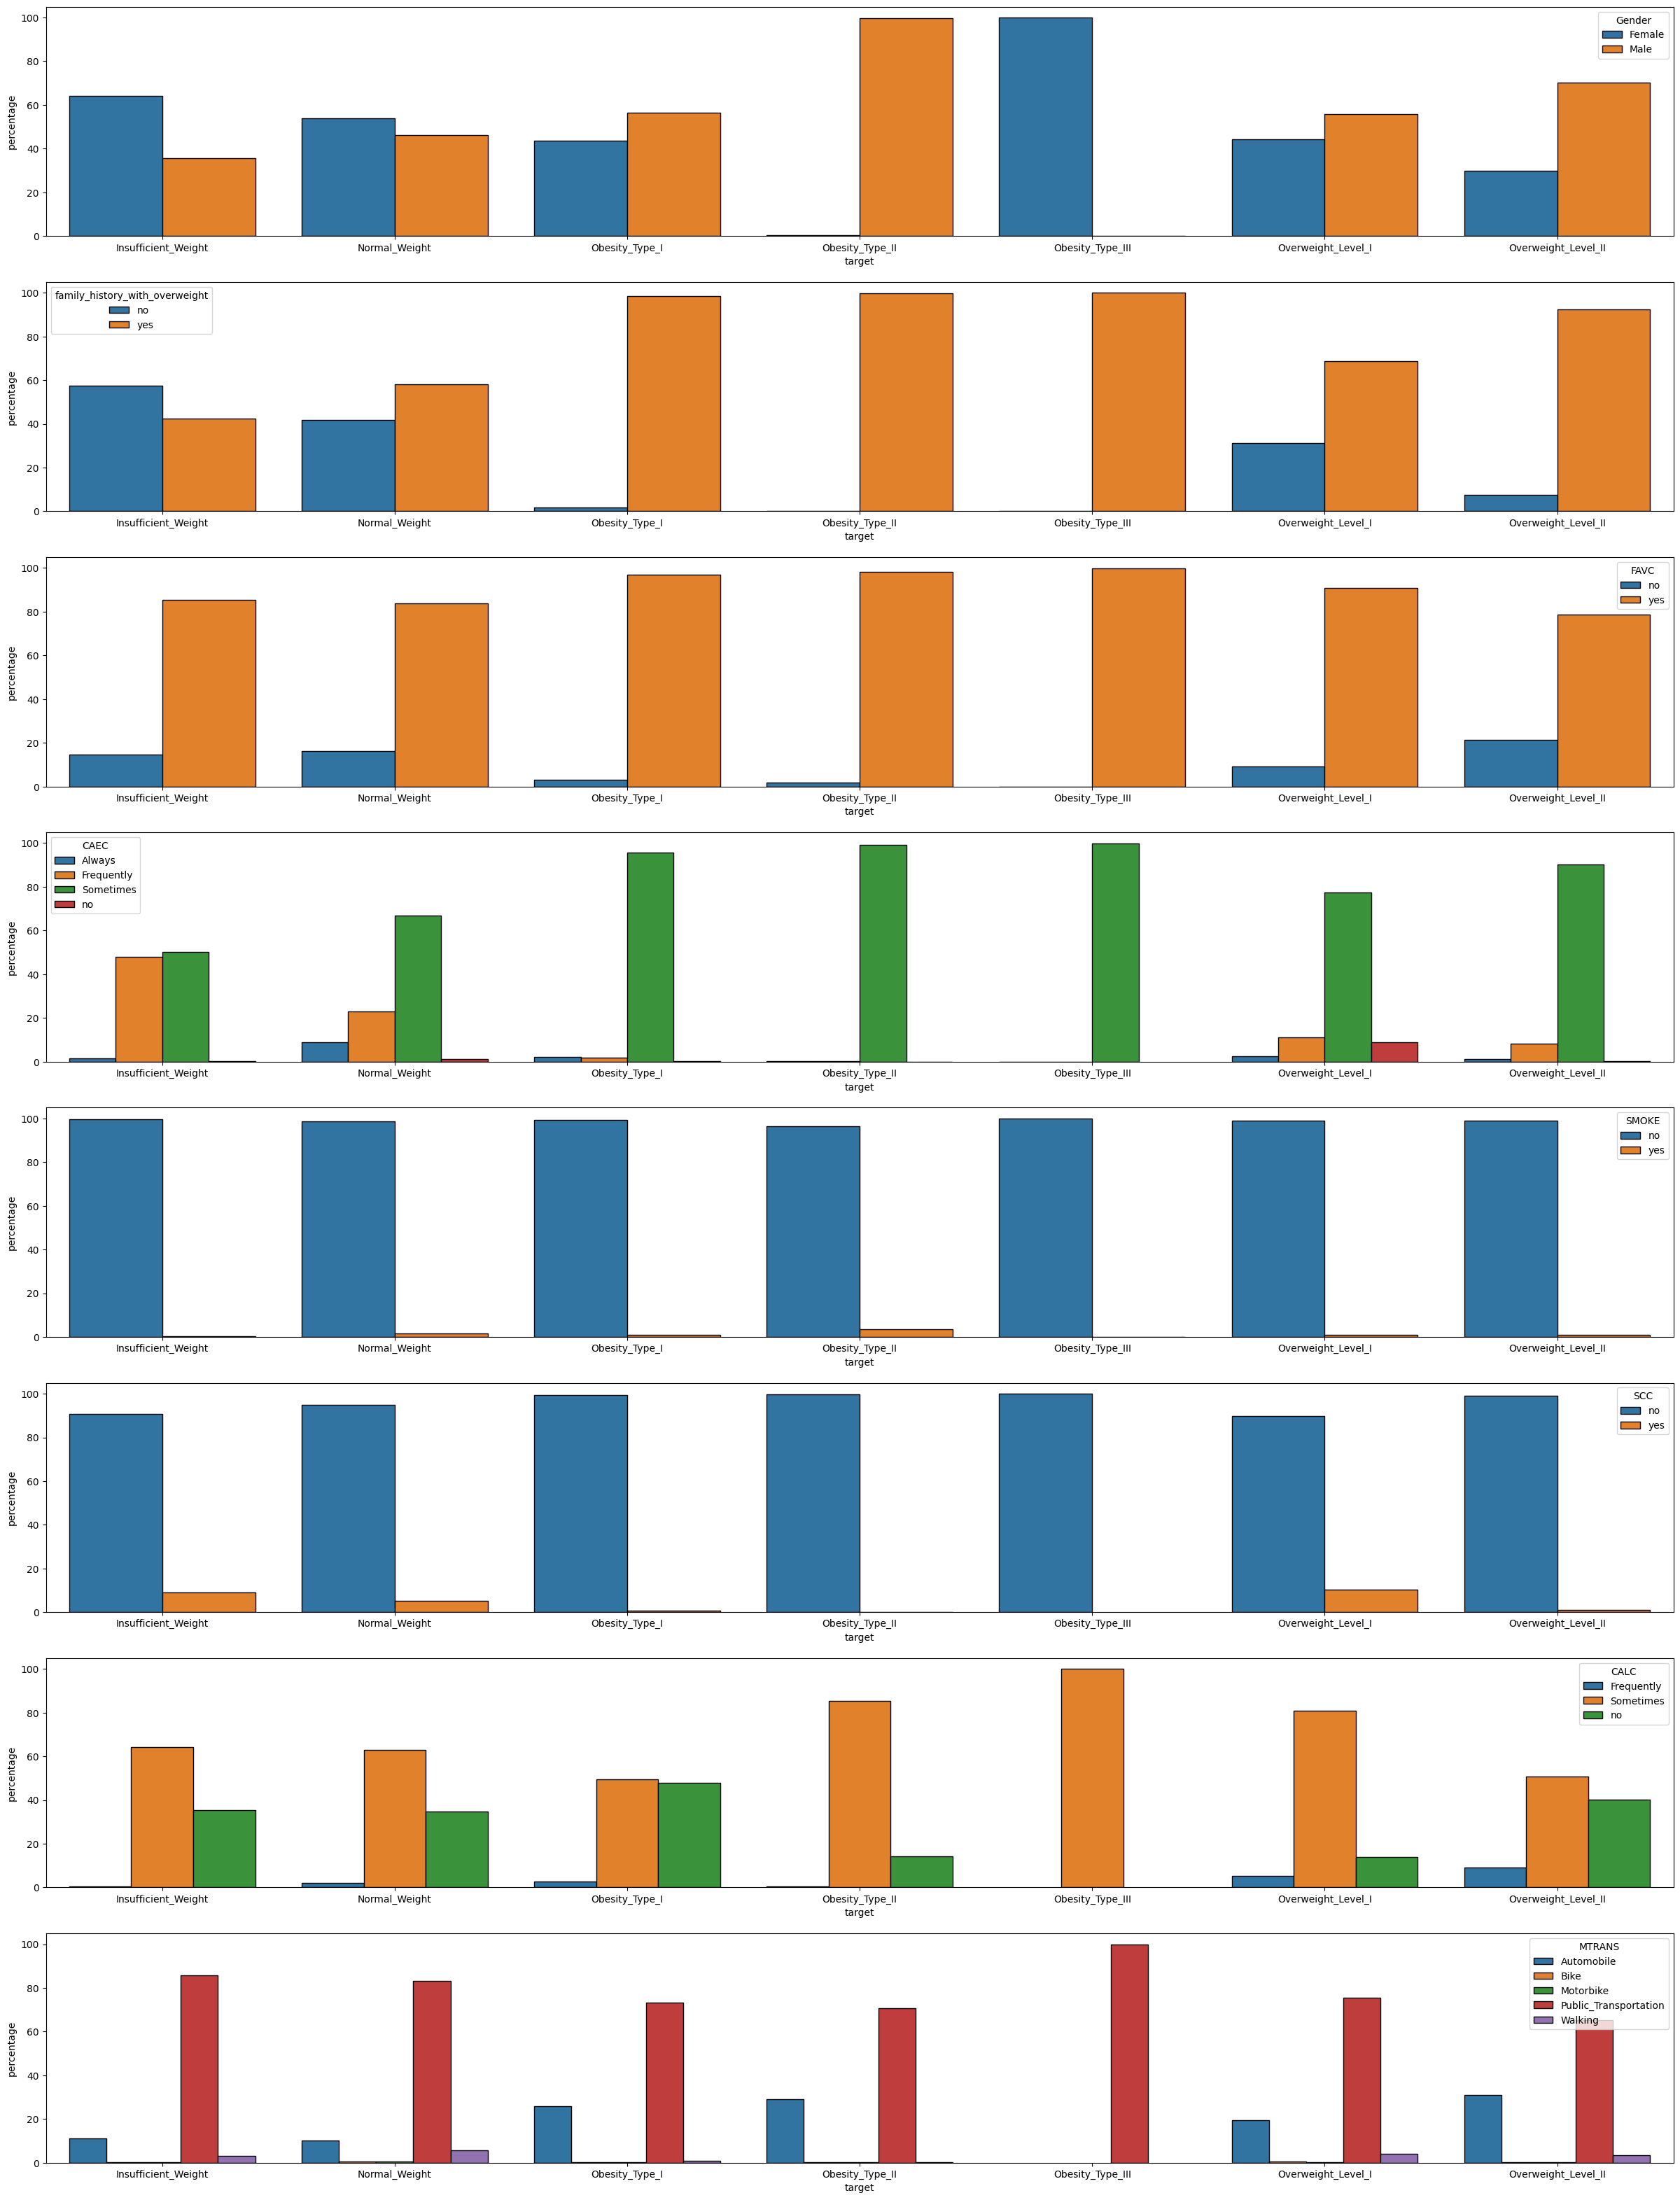

In [15]:
# Okay everything is super representative no problems with categorical data

def get_data_for_chart(category):
    grouped_data = df.groupby(['target', category]).size().reset_index(name='count')
    total_counts = grouped_data.groupby('target')['count'].sum()
    grouped_data['percentage'] = grouped_data.apply(lambda row: (row['count'] / total_counts[row['target']]) * 100, axis=1)
    
    return grouped_data

n = len(cat_features)
plt.figure(figsize = (30,40))
for idx,cat in enumerate(cat_features):
    data = get_data_for_chart(cat)
    plt.subplot(n,1,idx+1)
    sns.barplot(x = 'target', y = 'percentage', hue = f"{cat}", data = data, edgecolor = 'black')

# Data Encoding

At this point we want to encode

1. Target variables

2. Encode categorical features 

In [16]:
# Encode target

from sklearn.preprocessing import LabelEncoder 
encoder = LabelEncoder()

target_encoder = encoder.fit(df['target'])
df['target'] = target_encoder.transform(df['target'])

In [17]:
encoded_classes = target_encoder.classes_
print(encoded_classes)

['Insufficient_Weight' 'Normal_Weight' 'Obesity_Type_I' 'Obesity_Type_II'
 'Obesity_Type_III' 'Overweight_Level_I' 'Overweight_Level_II']


In [18]:
encoding2target = {}
for k,v in enumerate(encoded_classes):
    encoding2target[k] = v
    
target2encoding = {}
for k,v in enumerate(encoded_classes):
    target2encoding[v] = k

print(encoding2target)
print(target2encoding)

{0: 'Insufficient_Weight', 1: 'Normal_Weight', 2: 'Obesity_Type_I', 3: 'Obesity_Type_II', 4: 'Obesity_Type_III', 5: 'Overweight_Level_I', 6: 'Overweight_Level_II'}
{'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Obesity_Type_I': 2, 'Obesity_Type_II': 3, 'Obesity_Type_III': 4, 'Overweight_Level_I': 5, 'Overweight_Level_II': 6}


In [19]:
# Feature encoding 
from sklearn.preprocessing import LabelEncoder 
feature_encoder = LabelEncoder()

class I_feature_encoder():
    def __init__(self,feature: pd.Series):
        self.name = feature.name
        self.encoder = LabelEncoder()
        
        # Encoding
        self.encoder.fit(feature)
        self.tranformed_feature = self.encoder.transform(feature)
        
        # Returns 
        # 1) class_oject with encoder atribute
        # 2) encoded feature as pd.Series
    
    def __call__(self):
        return self,self.tranformed_feature
    
# Create storage 

class All_features_encoders():
    def __init__(self):
        self.dictionary = {}
    
    def add_feature_encoder(self,encoder_obj = I_feature_encoder):
        feature_name = encoder_obj.name
        self.dictionary[feature_name] = encoder_obj
        return 
    
    def __getitem__(self,feature):
        return self.dictionary[feature]
        
# Run cycle 

ecnoders_storage = All_features_encoders()
for cat_feature in cat_features:
    # Create object
    obj = I_feature_encoder(df[cat_feature])

    # Add object
    ecnoders_storage.add_feature_encoder(obj)


In [22]:
# Encode all the categorical features in the dataset
for cat_feature in cat_features:
    df[cat_feature] = ecnoders_storage[cat_feature].tranformed_feature

# Training model

1. Select model

2. Fit model

3. Experiment with parameters

4. Check classifcation metrices 

5. Check model quality on cross-validation

------

## Improve model

1. Generate new features

2. Improve with data-classterization

3. Use stacking (optional)

In [23]:
# Lets store all the results of the models in specific dictionary
models_accuracy_dictionary = {}

In [24]:
df = df.drop("id", axis = 1)
df_base_features = df.columns.values

## Model 1. Random Forese Classifier

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

rfc_model = RandomForestClassifier()

X = df.drop("target", axis = 1)
Y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [26]:
rfc_model.fit(X_train,y_train)
prediction = rfc_model.predict(X_test)

In [27]:
print(classification_report(y_test,prediction,target_names = target2encoding.keys()))
print()
print(f"Accuracy score = {accuracy_score(prediction,y_test):.4f}")
models_accuracy_dictionary["rfc_model_no_fe"] = accuracy_score(prediction,y_test)

                     precision    recall  f1-score   support

Insufficient_Weight       0.94      0.91      0.93       835
      Normal_Weight       0.84      0.89      0.86       995
     Obesity_Type_I       0.88      0.86      0.87       952
    Obesity_Type_II       0.96      0.98      0.97      1089
   Obesity_Type_III       1.00      1.00      1.00      1334
 Overweight_Level_I       0.79      0.74      0.77       799
Overweight_Level_II       0.79      0.80      0.79       847

           accuracy                           0.90      6851
          macro avg       0.88      0.88      0.88      6851
       weighted avg       0.90      0.90      0.89      6851


Accuracy score = 0.8952


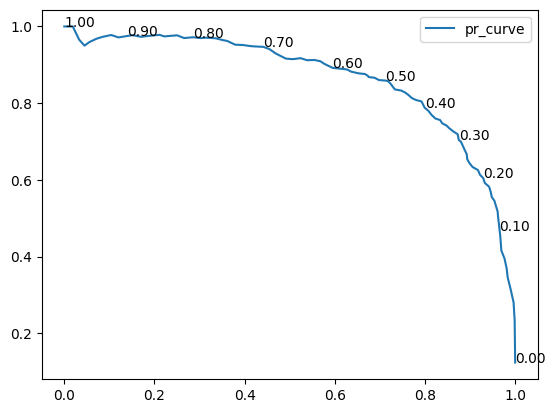

In [28]:
# Lets build PR curve for Overweight_Level_II 
_ = y_test.map(lambda x: 1 if x == 6 else 0)
p_ = rfc_model.predict_proba(X_test)[:,6]
precision_Overweight_Level_II, recall_Overweight_Level_II, thresholds_Overweight_Level_II = precision_recall_curve(_, p_)

sns.lineplot(x = recall_Overweight_Level_II, y = precision_Overweight_Level_II)
for i, threshold in enumerate(thresholds_Overweight_Level_II):
    if i % 10 ==0:
        plt.text(recall_Overweight_Level_II[i], precision_Overweight_Level_II[i], f'{threshold:.2f}')
plt.legend(['pr_curve'])

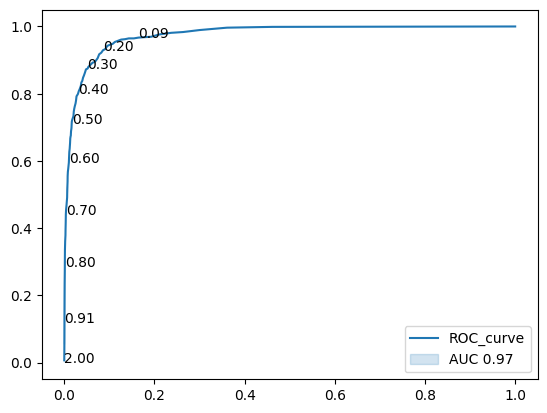

In [29]:
# Lets build ROC curve for Overweight_Level_II 
_ = y_test.map(lambda x: 1 if x == 6 else 0)
p_ = rfc_model.predict_proba(X_test)[:,6]
FPR_Overweight_Level_II, recall_Overweight_Level_II, thresholds_Overweight_Level_II = roc_curve(_,p_)
sns.lineplot(x = FPR_Overweight_Level_II, y = recall_Overweight_Level_II)
for i, threshold in enumerate(thresholds_Overweight_Level_II):
    if i % 10 ==0:
        plt.text(FPR_Overweight_Level_II[i], recall_Overweight_Level_II[i], f'{threshold:.2f}')
        
auc_val = auc(FPR_Overweight_Level_II,recall_Overweight_Level_II)
plt.legend(['ROC_curve', f"AUC {auc_val:.2f}"])

In [30]:
# To tell the truth we get discent AUC value

def AUC_for_multiclass(model,y_test, weighted = False):
    n = len(y_test)
    dictionary = {}
    class_size = []
    for class_ in rfc_model.classes_:
        _ = y_test.map(lambda x: 1 if x == class_ else 0)
        class_proportion = class_size.append(sum(_)/n)
        
        p_ = rfc_model.predict_proba(X_test)[:,class_]
        FPR, recall, thresholds = roc_curve(_,p_)
        dictionary[class_] = [FPR,recall,thresholds]
        
    for key in dictionary:
        FPR, recall, thresholds = dictionary[key]
        auc_val = auc(FPR,recall)
        dictionary[key] = auc_val
    
    if not weighted:
        return dictionary,class_size
    
    else:
        for key,value in dictionary.items():
            dictionary[key] = class_size[key]*value
        
        return sum(dictionary.values()),class_size

print(f"Weighted AUC = {AUC_for_multiclass(rfc_model,y_test,weighted = True)[0]:.3f}")

Weighted AUC = 0.988


<Axes: >

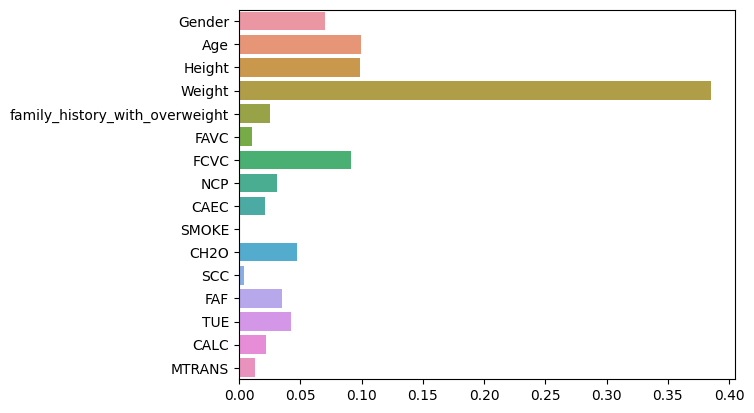

In [31]:
# Check wich features play a key role in the model
sns.barplot(x = rfc_model.feature_importances_, y = X.columns, orient = 'h')

# Feature Engineering

In [32]:
"""
Frequent consumption of high caloric food (FAVC)
Frequency of consumption of vegetables (FCVC)
Number of main meals (NCP)
Consumption of food between meals (CAEC)
Consumption of water daily (CH20)
Consumption of alcohol (CALC)
Calories consumption monitoring (SCC)
Physical activity frequency (FAF)
Time using technology devices (TUE)
Transportation used (MTRANS)

"""

df['weight*log(Age)'] = df['Weight']*np.log(df['Age'])
df['weight^2'] = df['Weight']**2
df['FCVC^2'] = df['FCVC']**2
df['log(FAF)'] = np.log(df['FAF'])
df['log(FAF)'].replace(-1*np.inf,-1e-6,inplace = True)
df['gender*weight*log(Age)'] = df["Gender"]+1 * df['weight*log(Age)']

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

rfc_model = RandomForestClassifier()

X = df.drop("target", axis = 1)
Y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [34]:
rfc_model.fit(X_train,y_train)
prediction = rfc_model.predict(X_test)

In [35]:
print(classification_report(y_test,prediction,target_names = target2encoding.keys()))
print()
print(f"Accuracy score = {accuracy_score(prediction,y_test):.4f}")
models_accuracy_dictionary["rfc_model_with_fe"] = accuracy_score(prediction,y_test)

                     precision    recall  f1-score   support

Insufficient_Weight       0.93      0.92      0.93       835
      Normal_Weight       0.86      0.86      0.86       995
     Obesity_Type_I       0.88      0.87      0.87       952
    Obesity_Type_II       0.96      0.97      0.97      1089
   Obesity_Type_III       1.00      1.00      1.00      1334
 Overweight_Level_I       0.78      0.78      0.78       799
Overweight_Level_II       0.78      0.79      0.79       847

           accuracy                           0.90      6851
          macro avg       0.88      0.88      0.88      6851
       weighted avg       0.90      0.90      0.90      6851


Accuracy score = 0.8953


<Axes: >

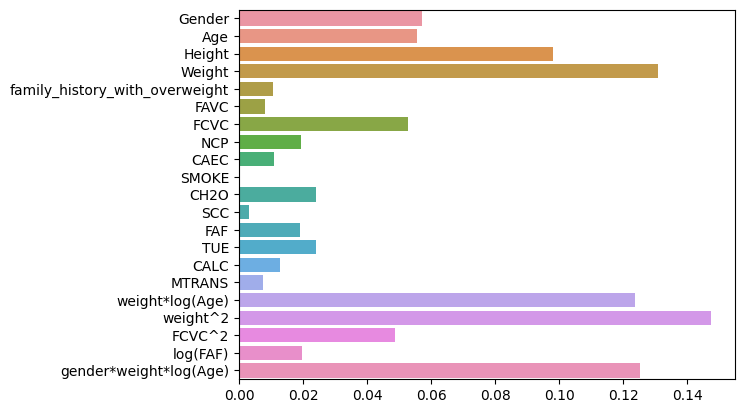

In [36]:
# Check wich features play a key role in the model
sns.barplot(x = rfc_model.feature_importances_, y = X.columns, orient = 'h')

In [37]:
def auto_feature_generator(df):
    df_initial = df.copy()
    for category in df.columns[:-1]:
        df = df_initial.copy()
        df['new_category'] =  df['Weight']*df[category]
        #df['new_category'].replace(-1*np.inf,-1e-6,inplace = True)
        rfc_model = RandomForestClassifier()
        X = df.drop("target", axis = 1)
        Y = df['target']
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
        rfc_model.fit(X_train,y_train)
        prediction = rfc_model.predict(X_test)
        res = accuracy_score(prediction,y_test)
        print(f"Feature = {category}, Accuracy score = {accuracy_score(prediction,y_test):.4f}")
        
        if res>0.9:
            print("Good feature!!!")

In [38]:
auto_feature_generator(df)

Feature = Gender, Accuracy score = 0.8924
Feature = Age, Accuracy score = 0.8948
Feature = Height, Accuracy score = 0.8951
Feature = Weight, Accuracy score = 0.8965
Feature = family_history_with_overweight, Accuracy score = 0.8955
Feature = FAVC, Accuracy score = 0.8946
Feature = FCVC, Accuracy score = 0.8913
Feature = NCP, Accuracy score = 0.8953
Feature = CAEC, Accuracy score = 0.8956


KeyboardInterrupt: 

# Clasterization to improve quality

* I will use Kmeans as we know the number of classes

In [39]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 7, random_state= 42)

kmeans.fit(X)
kmeans.predict(X)

df_kmeans = df.copy()
df_kmeans['kmeans'] = kmeans.predict(X)

from sklearn.decomposition import PCA
pca = PCA(n_components=3)

pca.fit(X)
viz_df = pca.transform(X)
viz_df = pd.DataFrame(viz_df)
viz_df['kmeans'] = df_kmeans['kmeans']

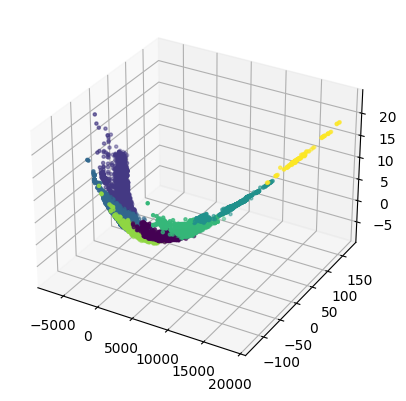

In [40]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
#ax = Axes3D(fig)
ax = fig.add_subplot(111, projection='3d') # Method 2
scatter = ax.scatter(xs = viz_df[0], ys = viz_df[1], zs = viz_df[2],s = 5, c = viz_df['kmeans'])

plt.show()

In [41]:
# We have cluster intersection problem
#  3 -> 4
#  4 -> 4
#  2 -> 2
#  6 -> 2

_ = df_kmeans.groupby(['target','kmeans'], as_index = False).size()
_.groupby('target').apply(lambda x: x.sort_values('size', ascending=False).iloc[0][['target', 'kmeans']]).reset_index(drop=True)

,target,kmeans
0,0,1
1,1,1
2,2,2
3,3,4
4,4,0
5,5,2
6,6,2


In [42]:
# Algorithm to set cluster for class

vv = _.sort_values("size", ascending = False)

class2classter = {}
for idx, row in vv.iterrows():
    class_, cluster, size = row
    
    # check that cluster is not taken
    if cluster not in class2classter.values():
        if class_ not in class2classter.keys():
            class2classter[class_] = cluster
            
        else:
            pass
    else:
        pass
    
class2classter

classter2class = {value: key for key, value in class2classter.items()}
class2classter

{4: 0, 0: 1, 3: 4, 6: 2, 2: 5}

In [43]:
df_kmeans['cluster2class_pred'] = df_kmeans['kmeans'].apply(lambda x: classter2class[x])

KeyError: 3

In [ ]:
# My clusterization approach seems to work very good with class 1
# So I will clasterization to predict wheter samples is a class 1

from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(df_kmeans['target'],df_kmeans['cluster2class_pred']), annot = True, fmt = '')
plt.ylabel("y_true",labelpad = 20,)
plt.xlabel("prediction", labelpad = 20)

In [44]:
df_kmeans.head(3)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,TUE,CALC,MTRANS,target,weight*log(Age),weight^2,FCVC^2,log(FAF),gender*weight*log(Age),kmeans
0,1,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,2,0,...,0.976473,1,3,6,261.045281,6669.980733,4.000000,-0.000001,262.045281,2
1,0,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,1,0,...,1.000000,2,0,1,164.751190,3249.000000,4.000000,0.000000,164.751190,1
2,0,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,2,0,...,1.673584,2,3,0,144.997679,2516.602874,3.536408,-0.143818,144.997679,1


In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

rfc_model = RandomForestClassifier()

X = df_kmeans.drop(["target"], axis = 1)
Y = df_kmeans['target']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [46]:
rfc_model.fit(X_train,y_train)
prediction = rfc_model.predict(X_test)

In [47]:
# Unfortunetly no significant improve in quality 1e-4 is nothing

print(classification_report(y_test,prediction,target_names = target2encoding.keys()))
print()
print(f"Accuracy score = {accuracy_score(prediction,y_test):.4f}")

                     precision    recall  f1-score   support

Insufficient_Weight       0.93      0.93      0.93       835
      Normal_Weight       0.86      0.87      0.86       995
     Obesity_Type_I       0.88      0.87      0.87       952
    Obesity_Type_II       0.96      0.97      0.97      1089
   Obesity_Type_III       1.00      1.00      1.00      1334
 Overweight_Level_I       0.78      0.77      0.77       799
Overweight_Level_II       0.78      0.79      0.79       847

           accuracy                           0.90      6851
          macro avg       0.88      0.88      0.88      6851
       weighted avg       0.90      0.90      0.90      6851


Accuracy score = 0.8958


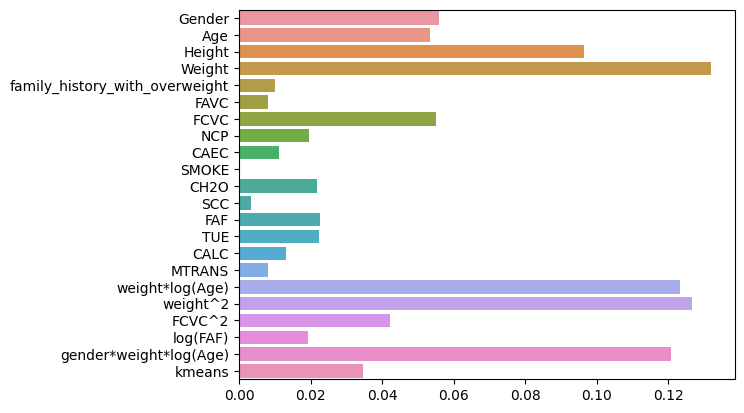

In [48]:
# Check wich features play a key role in the model
sns.barplot(x = rfc_model.feature_importances_, y = X.columns, orient = 'h')
models_accuracy_dictionary['rfc_with_clusters'] = accuracy_score(prediction,y_test)

# Model 2. Gradinet Boosting with CatBoost / XGBoost

In [49]:
df = df.loc[:,df_base_features]

In [50]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

X = df.drop("target", axis = 1)
Y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [51]:
X.head(3)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,1,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,2,0,2.763573,0,0.000000,0.976473,1,3
1,0,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,1,0,2.000000,0,1.000000,1.000000,2,0
2,0,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,2,0,1.910378,0,0.866045,1.673584,2,3


In [52]:
%%time
catboost  = CatBoostClassifier(verbose = False, random_seed=42)
catboost.fit(X_train,y_train)
prediction = catboost.predict(X_test)

CPU times: user 1min, sys: 3.64 s, total: 1min 4s
Wall time: 18.3 s


In [53]:
# Okay, so classic catboost without experiementing with hypeparameters gives us accuracy of 90.26%

print(classification_report(y_test,prediction,target_names = target2encoding.keys()))
print()
print(f"Accuracy score = {accuracy_score(prediction,y_test):.4f}")
models_accuracy_dictionary['catboost_deafault'] = accuracy_score(prediction,y_test)

                     precision    recall  f1-score   support

Insufficient_Weight       0.94      0.92      0.93       835
      Normal_Weight       0.87      0.88      0.88       995
     Obesity_Type_I       0.89      0.87      0.88       952
    Obesity_Type_II       0.96      0.98      0.97      1089
   Obesity_Type_III       1.00      1.00      1.00      1334
 Overweight_Level_I       0.78      0.79      0.78       799
Overweight_Level_II       0.80      0.81      0.81       847

           accuracy                           0.90      6851
          macro avg       0.89      0.89      0.89      6851
       weighted avg       0.90      0.90      0.90      6851


Accuracy score = 0.9025


<Axes: >

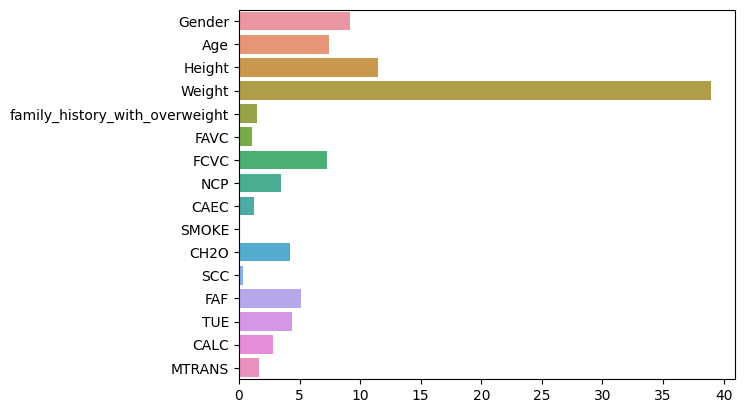

In [54]:
# Check wich features play a key role in the model
sns.barplot(x = catboost.feature_importances_, y = X.columns, orient = 'h')

# Experimenting with CatBoost params

In [55]:
from sklearn.model_selection import GridSearchCV

params = {"iterations": [400,500,750],
         "depth": [3,6,8]}

catboost  = CatBoostClassifier(verbose = False)
grid_search = GridSearchCV(estimator = catboost,
                           param_grid = params, 
                           scoring = 'accuracy',
                           cv = 3,
                           return_train_score = True)

In [56]:
# Will take ~20 mins

%%time
#grid_search.fit(X_train,y_train)

UsageError: Line magic function `%%time` not found.


In [57]:
# print(grid_search.best_score_)
# print(grid_search.best_params_)
# grid_search.best_params_['verbose'] = False

# 0.9045087939577665
# {'depth': 6, 'iterations': 750}

catboost  = CatBoostClassifier(iterations = 750, depth = 6, verbose = False)

In [58]:
catboost.fit(X_train,y_train)

In [59]:
prediction = catboost.predict(X_test)

In [60]:
print(classification_report(y_test,prediction,target_names = target2encoding.keys()))
print()
print(f"Accuracy score = {accuracy_score(prediction,y_test):.4f}")
models_accuracy_dictionary['catboost_best_params'] = accuracy_score(prediction,y_test)

                     precision    recall  f1-score   support

Insufficient_Weight       0.94      0.92      0.93       835
      Normal_Weight       0.86      0.87      0.87       995
     Obesity_Type_I       0.89      0.87      0.88       952
    Obesity_Type_II       0.97      0.98      0.97      1089
   Obesity_Type_III       1.00      1.00      1.00      1334
 Overweight_Level_I       0.77      0.78      0.78       799
Overweight_Level_II       0.81      0.81      0.81       847

           accuracy                           0.90      6851
          macro avg       0.89      0.89      0.89      6851
       weighted avg       0.90      0.90      0.90      6851


Accuracy score = 0.9013


# Featue Engineeing to improve CatBoost performance

In [61]:
"""
Frequent consumption of high caloric food (FAVC)
Frequency of consumption of vegetables (FCVC)
Number of main meals (NCP)
Consumption of food between meals (CAEC)
Consumption of water daily (CH20)
Consumption of alcohol (CALC)
Calories consumption monitoring (SCC)
Physical activity frequency (FAF)
Time using technology devices (TUE)
Transportation used (MTRANS)

"""

'\nFrequent consumption of high caloric food (FAVC)\nFrequency of consumption of vegetables (FCVC)\nNumber of main meals (NCP)\nConsumption of food between meals (CAEC)\nConsumption of water daily (CH20)\nConsumption of alcohol (CALC)\nCalories consumption monitoring (SCC)\nPhysical activity frequency (FAF)\nTime using technology devices (TUE)\nTransportation used (MTRANS)\n\n'

In [62]:
#df_save = df.copy()

In [63]:
df['body_mass_idx'] = df['Weight']*100 / df['Height']
num_features = np.append(num_features,'body_mass_idx')

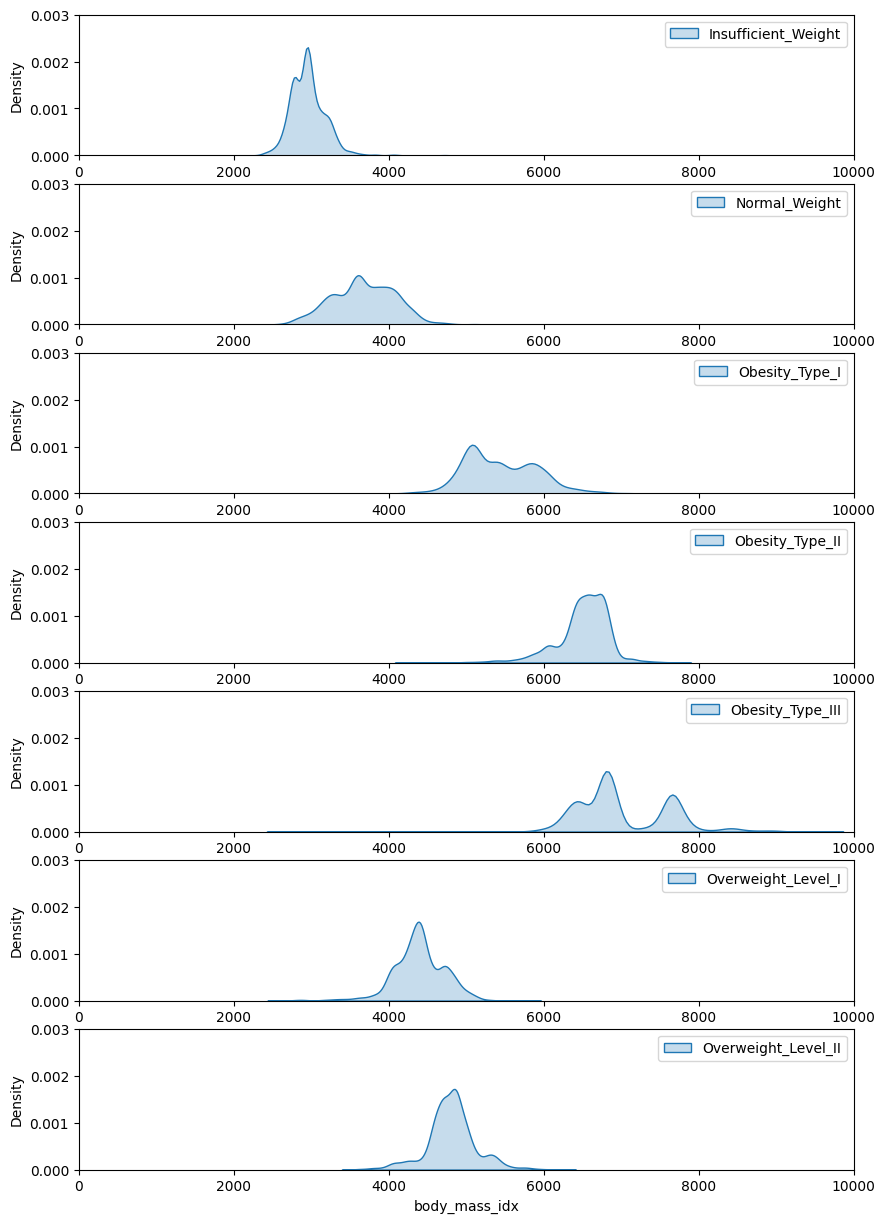

In [64]:
plt.figure(figsize = (10,15))
for class_idx in range(7):
    plt.subplot(7,1,class_idx+1)
    sns.kdeplot(df.loc[df['target'] == class_idx,'body_mass_idx'],fill = True, label = f"{encoding2target[class_idx]}")
    plt.xlim(0,10000)
    plt.ylim(0,0.003)
    plt.legend()

In [65]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

X = df.drop("target", axis = 1)
Y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [66]:
catboost.fit(X_train,y_train)

In [67]:
# Firstly lets look at the objects at which our model gives incorrect answers

prediction = catboost.predict(X_test)
print(f"Accuracy score = {accuracy_score(prediction,y_test):.4f}")

Accuracy score = 0.9028


In [68]:
mask = prediction.reshape(1,-1)[0] == y_test
not_predicted_df = X_test.loc[~mask]

not_predicted_df['target'] = y_test[~mask]
not_predicted_df['prediction'] = prediction[~mask]

In [69]:
missclassifcation_data = not_predicted_df.groupby(['target','prediction'], as_index = False).size()

Text(0.5, 23.52222222222222, 'prediction')

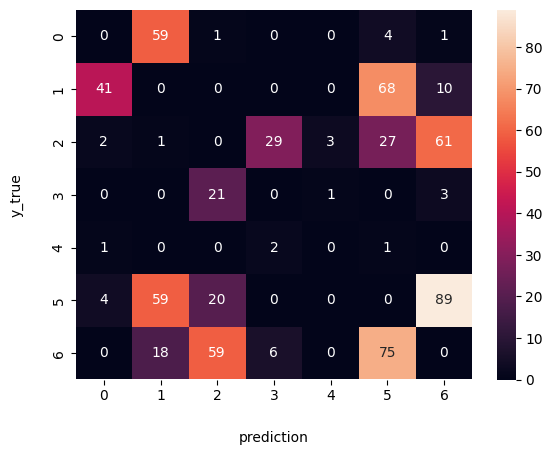

In [70]:
# The strangest thing is that our model missclassify:
# class 1 and 5
# class 5 and 1
# class 6 ans 2

from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(not_predicted_df['target'],not_predicted_df['prediction']), annot = True)
plt.ylabel("y_true",labelpad = 20,)
plt.xlabel("prediction", labelpad = 20)

In [71]:
# Lets compare two datasets 
# 1) Target == 1, but model predicted 5
# 2) Target == 1 and model predicted 1

# Hypothesis:
# There should be some difference in featues of first and second dataset
# Probably these differences cause model to get incorrect prediction
# So if we understand the difference between 2 samples, we might do something to teach our model to give correct predictions 

xx = X_test.copy()

xx['prediction'] = prediction
xx['target'] = y_test

missclass_s1 = xx.loc[(xx['target'] == 1)&(xx['prediction'] == 5)]
missclass_s2 = xx.loc[(xx['target'] == 1)&(xx['prediction'] == 1)]

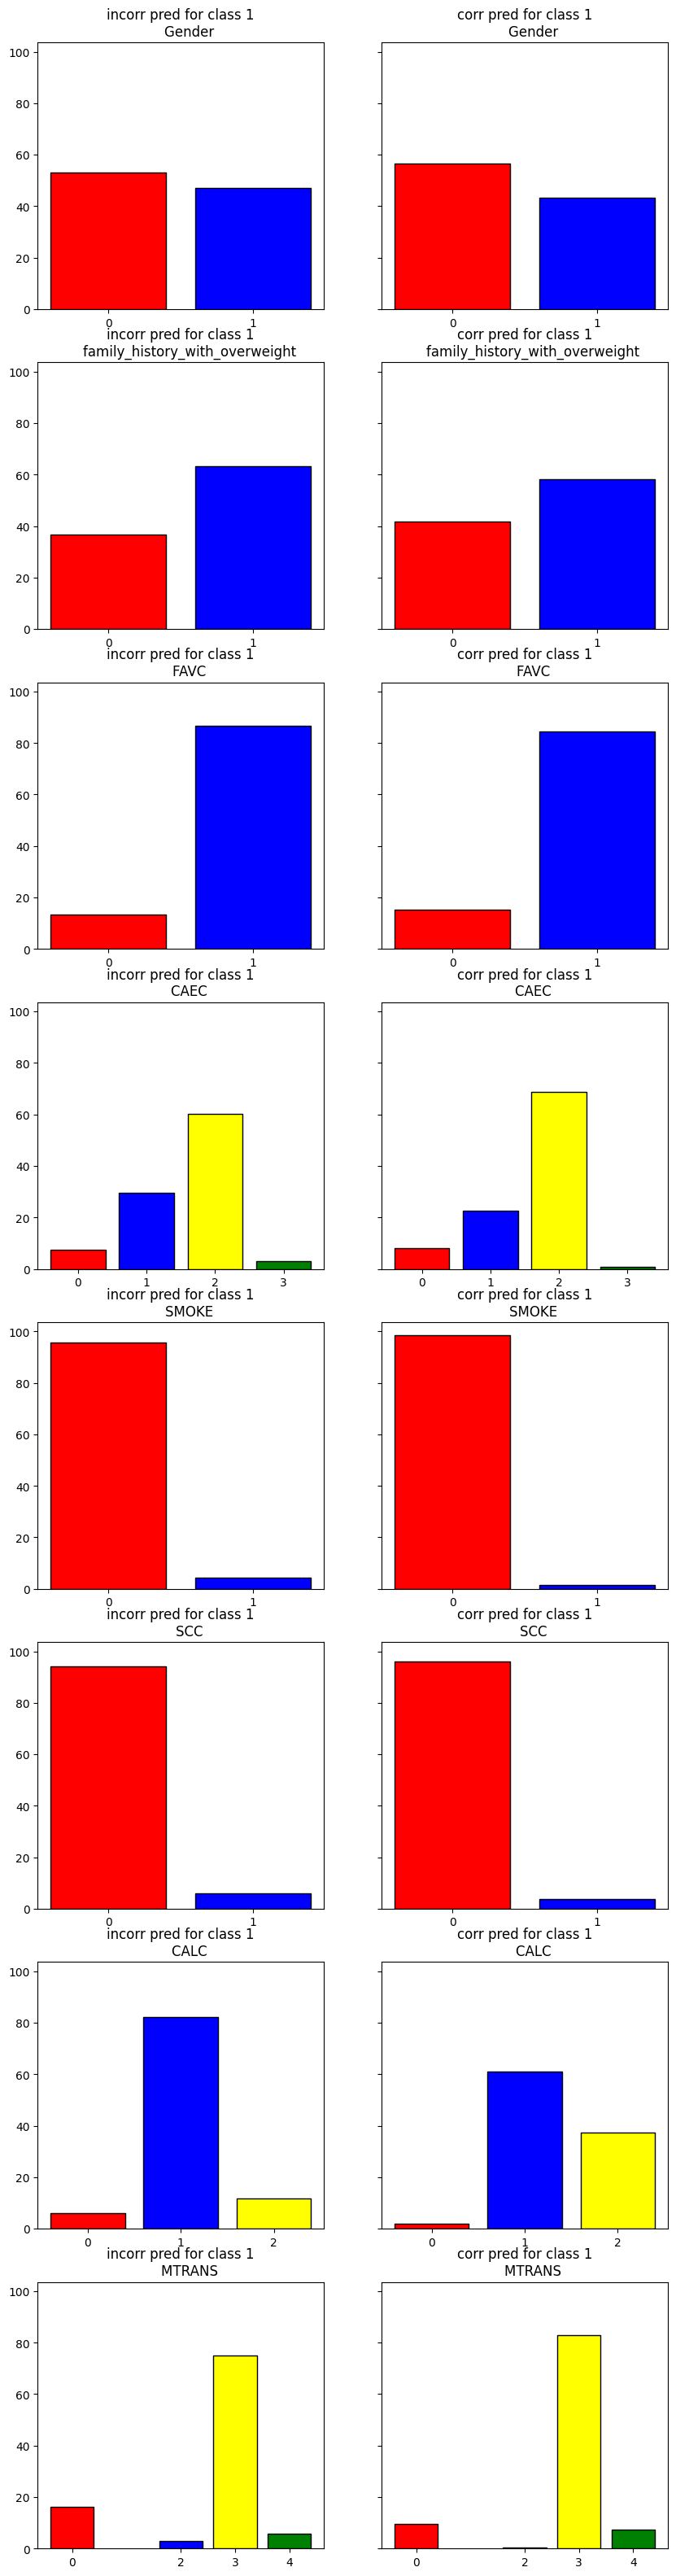

In [72]:
# I cant say, that I have noticed some significant difference in distribution of categorical featues
numbers = [1,2,3,4,5,6]
colors = {1: 'red', 2: 'blue', 3: 'yellow', 4: 'green', 5: 'pink', 6: 'brown'}
#color_list = list(map(colors.get, numbers))

def get_data_for_chart(df, category):
    grouped_data = df.groupby(['target', category]).size().reset_index(name='count')
    total_counts = grouped_data.groupby('target')['count'].sum()
    grouped_data['percentage'] = grouped_data.apply(lambda row: (row['count'] / total_counts[row['target']]) * 100, axis=1)
    
    return grouped_data

n = len(cat_features)
fig, ax = plt.subplots(nrows=n, ncols=2, sharey=True, figsize=(10, 40),)

for idx, cat in enumerate(cat_features):
    data = get_data_for_chart(missclass_s1, cat)
    ax[idx,0].bar(x=cat, height='percentage', data=data, edgecolor='black', label = data[cat], color = list(map(colors.get, numbers)))
    ax[idx,0].set_title(f"""incorr pred for class 1
    {cat}""")
    ax[idx,0].set_xticks(data[cat])
    
    data = get_data_for_chart(missclass_s2, cat)
    ax[idx,1].bar(x=cat, height='percentage', data=data, edgecolor='black',label = data[cat], color = list(map(colors.get, numbers)))
    ax[idx,1].set_title(f"""corr pred for class 1
    {cat}""")
    ax[idx,1].set_xticks(data[cat])

In [ ]:
target_5_df = df.loc[df['target'] == 5]
missclass_s1['pred_status'] = 'incorrect'
missclass_s2['pred_status'] = 'correct'
target_5_df['prediction'] = None
target_5_df['pred_status'] = "target5_dist"

merged_missclass = pd.concat((missclass_s1,missclass_s2,target_5_df), axis = 0)

In [ ]:
# This is more interesting!
# The weight feature, which plays a key role our model is distributed very different for incorrect predictions
# The fact that weight distribution is alike to class_5 distribution make our model to give incorrect class predictions
# I have decided that the best "move" is to normalaize data and drop outliers in height and weight data for each class

import warnings
warnings.filterwarnings('ignore')

# missclass_s1['pred_status'] = 'incorrect'
# missclass_s2['pred_status'] = 'correct'
# merged_missclass = pd.concat((missclass_s1,missclass_s2), axis = 0)

n  = len(num_features)
plt.figure(figsize = (10,20))
for idx, feature in enumerate(num_features[1:]):
    plt.subplot(n,1,idx+1)
    sns.boxplot(y = merged_missclass['pred_status'].astype('category'), x = merged_missclass[feature], orient = 'h')
    plt.ylabel(f"{feature}")
    #plt.yticks([f"correct - {encoding2target[1]}",f"incorrect - {encoding2target[5]}"])

# Experimenting with Normalizaton of Weight data

In [136]:
# Lets consider and outliers data with a z_score g

mu = df['Weight'].mean()
std = df['Weight'].std()

df['Normalized_Weight'] = (df['Weight'] - mu)/std

def find_outliers_iqr(series, k=1.5):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - k * iqr
    upper_bound = q3 + k * iqr
    return series[(series > lower_bound) | (series < upper_bound)]

for class_ in encoding2target.keys():
    part = df.loc[df['target'] == class_,'Normalized_Weight']
    part_no_outliers = find_outliers_iqr(part)
    df.loc[df['target'] == class_,'Normalized_Weight'] = part_no_outliers

In [138]:
#df_exp = df.drop(["Weight",'body_mass_idx'], axis = 1)
df_exp = df.copy()

In [139]:
df_exp.head(4)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,target,body_mass_idx,Normalized_Weight
0,1,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,2,0,2.763573,0,0.000000,0.976473,1,3,6,4804.120358,-0.235707
1,0,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,1,0,2.000000,0,1.000000,1.000000,2,0,1,3653.846154,-1.170903
2,0,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,2,0,1.910378,0,0.866045,1.673584,2,3,0,2931.167191,-1.429978
3,0,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,2,0,1.674061,0,1.467863,0.780199,1,3,4,7673.616000,1.644731


In [260]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

X = df_exp.drop("target", axis = 1)
Y = df_exp['target']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [143]:
catboost_normalized = CatBoostClassifier(iterations = 750, depth = 6, verbose = False)
catboost_normalized.fit(X_train,y_train)

In [144]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(catboost_normalized,X_train,y_train,scoring = 'accuracy', cv = 5)
print(f"Mean Accuracy_score = {np.mean(cv_scores):.3f}")

Mean Accuracy_score = 0.905


Accuracy score = 0.9028


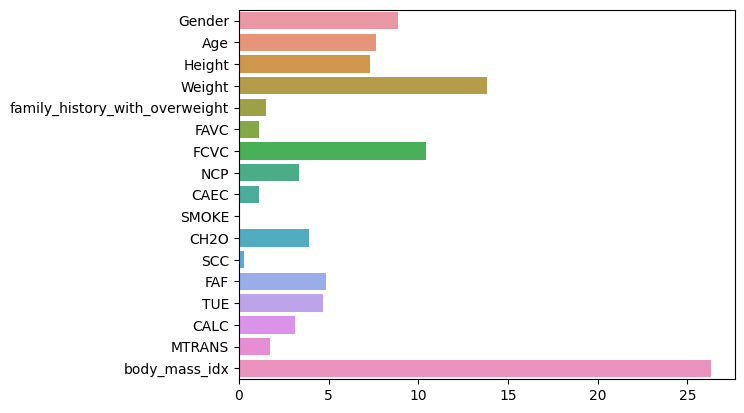

In [145]:
# Hmmm 2e-3 accuracy_score improvement 

prediction = catboost_normalized.predict(X_test)
sns.barplot(x = catboost_normalized.feature_importances_, y = catboost_normalized.feature_names_, orient = 'h')
print(f"Accuracy score = {accuracy_score(prediction,y_test):.4f}")
models_accuracy_dictionary['catboost_normalized_no_fe_drop'] =  accuracy_score(prediction,y_test)

# Final Push. Featue Engineering on Normalized Data

In [149]:
df.head(3)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,FAF,TUE,CALC,MTRANS,target,body_mass_idx,Normalized_Weight,Weight^2,Height^2,Weight*log(Age)
0,1,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,2,0,...,0.000000,0.976473,1,3,6,4804.120358,-0.235707,6669.980733,2.889993,261.045281
1,0,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,1,0,...,1.000000,1.000000,2,0,1,3653.846154,-1.170903,3249.000000,2.433600,164.751190
2,0,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,2,0,...,0.866045,1.673584,2,3,0,2931.167191,-1.429978,2516.602874,2.929095,144.997679


In [148]:
df['Weight^2'] = df['Weight']**2
df['Height^2'] = df['Height']**2
df['Weight*log(Age)'] = df['Weight'] * np.log(df['Age'])

In [150]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

X = df.drop("target", axis = 1)
Y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [151]:
catboost_with_new_features = CatBoostClassifier(iterations = 750, depth = 6, verbose = False)

In [152]:
catboost_with_new_features.fit(X_train,y_train)

In [422]:
# from sklearn.model_selection import cross_val_score
# cv_scores = cross_val_score(catboost,X_train,y_train,scoring = 'accuracy', cv = 5)
# print(f"Mean Accuracy_score = {np.mean(cv_scores):.3f}")

In [153]:
# Firstly lets look at the objects at which our model gives incorrect answers

prediction_with_new_features = catboost_with_new_features.predict(X_test)
print(f"Accuracy score = {accuracy_score(prediction,y_test):.4f}")
models_accuracy_dictionary['catboost_bp_with_fe'] = accuracy_score(prediction,y_test)

Accuracy score = 0.9028


Accuracy score = 0.9028


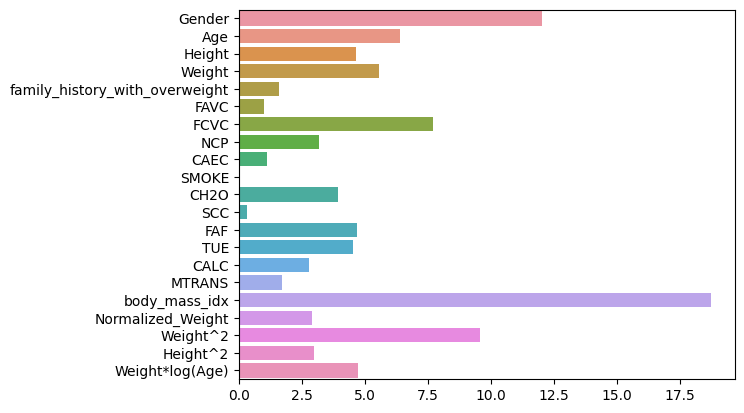

In [154]:
# No significant improve in performance :c

prediction_with_new_features = catboost.predict(X_test)
sns.barplot(x = catboost_with_new_features.feature_importances_, y = catboost_with_new_features.feature_names_, orient = 'h')
print(f"Accuracy score = {accuracy_score(prediction_with_new_features,y_test):.4f}")

# Evaluation of different models and results

In [169]:
val_df = pd.DataFrame(data = models_accuracy_dictionary.values(), index = models_accuracy_dictionary.keys(), columns = ['model_ac_score'])
val_df = val_df.reset_index()
val_df = val_df.rename(columns = {'index':'model_type'})

In [172]:
# I should use CV scores

val_df.sort_values("model_ac_score", ascending = False)

,model_type,model_ac_score
5,catboost_normalized_no_fe_drop,0.902788
6,catboost_bp_with_fe,0.902788
3,catboost_deafault,0.902496
4,catboost_best_params,0.901328
2,rfc_with_clusters,0.894906
1,rfc_model_with_fe,0.894760
0,rfc_model_no_fe,0.894030


# Creating a pipeline to work with RAW data

In [331]:
df_base = pd.read_csv("/kaggle/input/playground-series-s4e2/train.csv")

In [332]:
df_base.head(3)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight


In [333]:
# Lets teach catboost on a full data

X = df.drop("target", axis = 1)
Y = df['target']

catboost_with_new_features = CatBoostClassifier(iterations = 750, depth = 6, verbose = False)
catboost_with_new_features.fit(X,Y)

KeyboardInterrupt: 

In [263]:
from sklearn.base import BaseEstimator, TransformerMixin
import itertools

class CustomFunctionTransformer():
    
    def __init__(self,
                 cat_features=[],
                 num_features = [],
                 target_name='NObeyesdad'):
        
        self.cat_features = cat_features
        self.num_features = num_features
        self.target_name = target_name
                        
    def predict(self,
            X):
        
        X_ = X.copy()
        
        # predicting
        prediction = catboost_with_new_features.predict(X_)
        prediction = [encoding2target[i] for i in prediction.ravel()]
        
        X_[self.target_name] = prediction
        
        return X_
    
    def transform(self,
                  X,
                  y=None):
        
        # How we transform X
        
        # Encoding categorical columns
        X_ = X.copy()
        
        le = LabelEncoder()
        for cat_col in self.cat_features:
            X_[cat_col] = le.fit_transform(X_[cat_col])
        
        # Add new features
        
        mu = X_['Weight'].mean()
        std = X_['Weight'].std()

        X_['Normalized_Weight'] = (X_['Weight'] - mu)/std
        X_['body_mass_idx'] = X_['Weight']*100 / X_['Height']
        X_['Weight^2'] = X_['Weight']**2
        X_['Height^2'] = X_['Height']**2
        X_['Weight*log(Age)'] = X_['Weight'] * np.log(X_['Age'])
        
     
        # Arange features 
        
        features_arange = ['Gender',
                             'Age',
                             'Height',
                             'Weight',
                             'family_history_with_overweight',
                             'FAVC',
                             'FCVC',
                             'NCP',
                             'CAEC',
                             'SMOKE',
                             'CH2O',
                             'SCC',
                             'FAF',
                             'TUE',
                             'CALC',
                             'MTRANS',
                             'body_mass_idx',
                             'Normalized_Weight',
                             'Weight^2',
                             'Height^2',
                             'Weight*log(Age)']
        
        X_ = X_[features_arange]
            
        return X_

In [338]:
test_df = pd.read_csv("/kaggle/input/playground-series-s4e2/test.csv")
id_save = pd.read_csv("/kaggle/input/playground-series-s4e2/test.csv")['id']

In [339]:
transformer_obj = CustomFunctionTransformer(cat_features,num_features)

In [340]:
X = transformer_obj.transform(test_df)
X = transformer_obj.predict(X) 

In [341]:
X['id'] = id_save

In [342]:
sumbission = X[['id',transformer_obj.target_name]]

In [343]:
sumbission.to_csv("submission.csv", index = False)

# Let's add original dataset

In [344]:
df_OB = pd.read_csv("/kaggle/input/obesity-or-cvd-risk-classifyregressorcluster/ObesityDataSet.csv")

In [345]:
df_big = df_base._append(df_OB)

In [346]:
df_big.drop('id', axis = 1, inplace = True)

In [347]:
df_big.head(3)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight


In [348]:
X = df_big.drop('NObeyesdad', axis = 1)
y = df_big['NObeyesdad']

In [349]:
X = transformer_obj.transform(X)

In [350]:
y = [target2encoding[i] for i in y.values]

In [355]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [356]:
from sklearn.model_selection import GridSearchCV

min_data_in_leaf_p = [1,3,5,10,20,40]

params = {"iterations": [400,500,750],
         "depth": [3,6,8],
          'min_data_in_leaf': min_data_in_leaf_p}

catboost  = CatBoostClassifier(verbose = False)
grid_search = GridSearchCV(estimator = catboost,
                           param_grid = params, 
                           scoring = 'accuracy',
                           cv = 4,
                           return_train_score = True)

In [352]:
# %%time
# grid_search.fit(X_train,y_train)

In [353]:
# print(grid_search.best_score_)
# print(grid_search.best_params_)
# grid_search.best_params_['verbose'] = False

# 0.9045087939577665
# {'depth': 6, 'iterations': 750}


# 0.9104030320644914
# {'depth': 6, 'iterations': 500, 'min_data_in_leaf': 1}

#catboost  = CatBoostClassifier(iterations = 750, depth = 6, verbose = False)

AttributeError: 'GridSearchCV' object has no attribute 'best_score_'

In [357]:
catboost_with_new_features = CatBoostClassifier(iterations = 500, depth = 6, min_data_in_leaf = 1, verbose = False)

In [358]:
catboost_with_new_features.fit(X_train,y_train)

In [359]:
prediction = catboost_with_new_features.predict(X_test)

In [360]:
accuracy_score(y_test,prediction)

0.9049953623956539